In [109]:
#import data

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [110]:
#converting data 

df = pd.read_csv('D:\Project 4\Data\movies.csv')

In [111]:
#replace null values if any
df[df.select_dtypes('float64').columns] = df.select_dtypes('float64').fillna(0)

In [112]:
#Changing Datatypes
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df ['gross'].astype('Int64')

In [113]:
# creating a new column of Year correct
df['yearcorrect'] = df['released'].str.extract('([0-9]{4})')
df['yearcorrect'] = df['yearcorrect'].fillna(0).astype(int)


In [114]:
#drop duplicates
df.drop_duplicates(inplace= True)

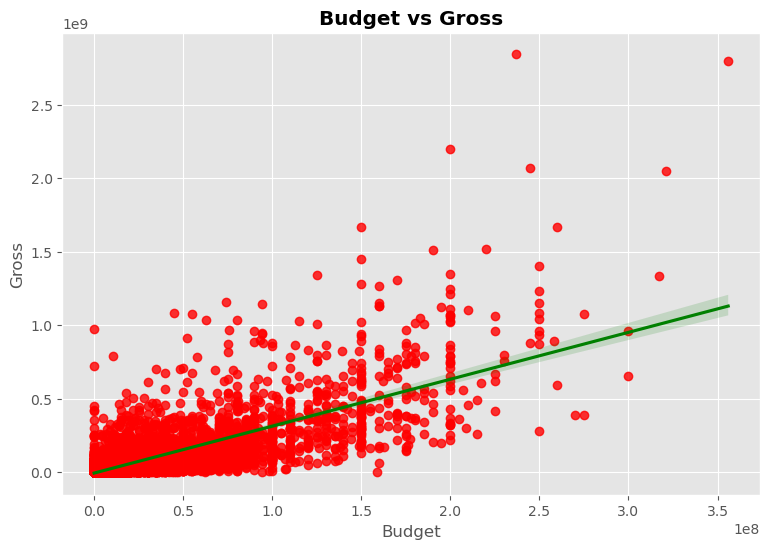

In [115]:
# ploting the Budget vs Gross
plt.figure(figsize=(9, 6))
sns.regplot(data= df, x= 'budget', y= 'gross', scatter_kws= {'color': 'red'}, line_kws= {'color': 'green'} )
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.title('Budget vs Gross', fontweight = 'bold')
plt.show()

In [116]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = df_numeric.corr()

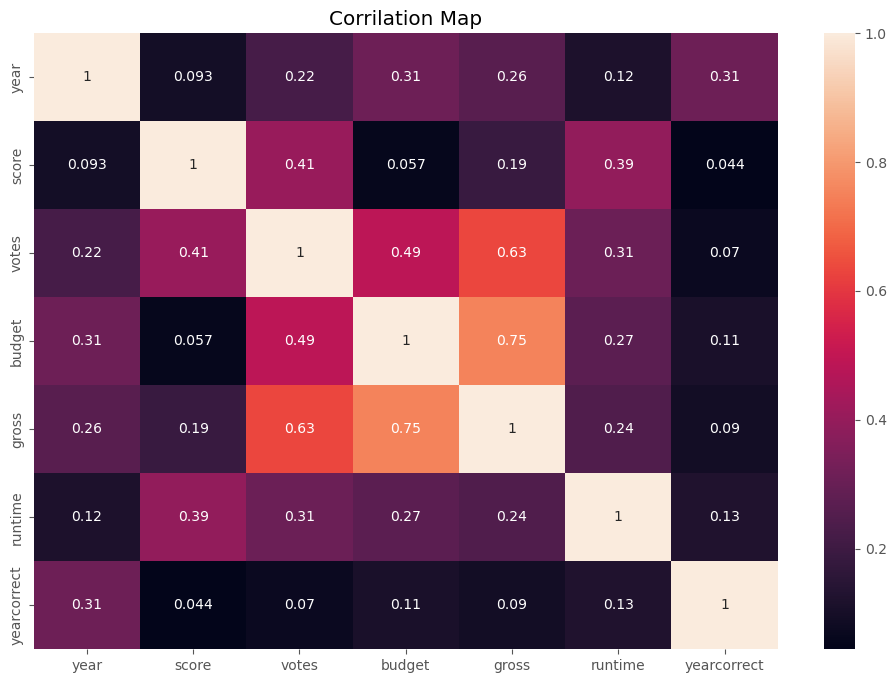

In [117]:
#ploting corrilaation matrix

sns.heatmap(correlation_matrix, annot= True)
plt.title('Corrilation Map')
plt.show()

In [120]:
df_numb = df.copy()
df_1 = df_numb[df.select_dtypes('object').columns]
for c in df_1:
    df_numb[c] = df_numb[c].astype('category') 
    df_numb[c] = df_numb[c].cat.codes

df_numb = df_numb.corr()

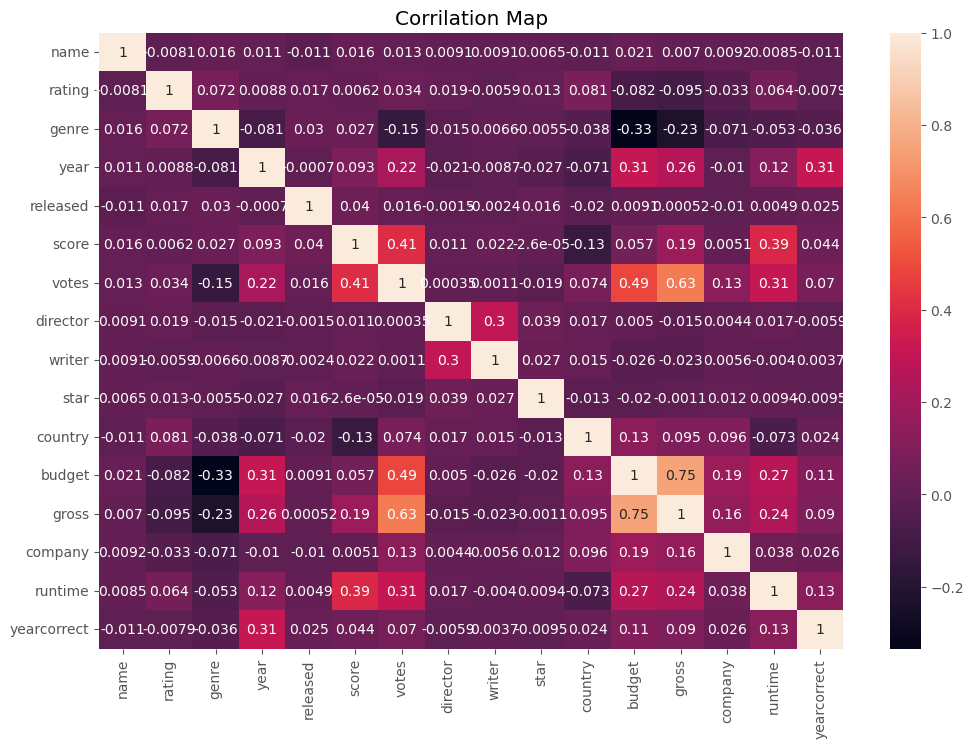

In [121]:
sns.heatmap(df_numb, annot= True)
plt.title('Corrilation Map')
plt.show()

In [138]:
df_numb.unstack().sort_values(ascending= False).iloc[16:26]

budget   gross      0.750157
gross    budget     0.750157
votes    gross      0.632870
gross    votes      0.632870
votes    budget     0.486931
budget   votes      0.486931
votes    score      0.407101
score    votes      0.407101
         runtime    0.394564
runtime  score      0.394564
dtype: float64